The Model parameters are:[7.98554746 0.03573724]
Intercept:290.6377035073201
The predicted values for the test_csv is: [1472.85610043 1329.54509292 1491.54322528  606.00515051  291.45965993
 1139.75029006  964.42561823  378.62167455  658.72336877 1102.71726884
  506.74780632  645.53977823  459.51352902 1209.94056715  506.46190843
  854.95087406  778.89969031  459.97811308  713.9074563  1561.16170659
 1472.57020255  587.53244908 1226.41198338  834.40541296  646.07583677
  796.55043532 1075.83017312  291.5311344   718.83919483  687.61174969]
The mean square error if the model for the given dataset are: 0.8560502775103181
The response value for the given sample feature values are : [445.07913523]


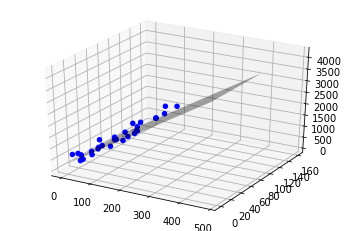

In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[38]:


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model, metrics
from mpl_toolkits.mplot3d import axes3d


# In[28]:


df_train2 = pd.read_csv("PB2_train.csv",header = None)
df_test2 = pd.read_csv("PB2_test.csv",header = None)


# In[29]:


df_train2_features = df_train2.iloc[:,[0,1]]
df_train2_response = df_train2.iloc[:,-1]


# In[30]:


reg2 = linear_model.LinearRegression()
reg2.fit(df_train2_features,df_train2_response)
print("The Model parameters are:{}".format(reg2.coef_))
print("Intercept:{}".format(reg2.intercept_))



# In[31]:


df_test2_features = df_test2.iloc[:,[0,1]]
df_test2_response = df_test2.iloc[:,-1]


# In[32]:


predicted_values = reg2.predict(df_test2_features)
print("The predicted values for the test_csv is: {}".format(predicted_values))


# In[33]:


mean_sqr_error = reg2.score(df_test2_features,df_test2_response)
print("The mean square error if the model for the given dataset are: {}".format(mean_sqr_error))


# In[34]:


X = np.array([19,76])
X.reshape(1,-1)
sample_predict = reg2.predict([X])
print("The response value for the given sample feature values[19,76] are : {}".format(sample_predict))


# In[41]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X= df_test2_features.iloc[:,0].tolist() 
Y= df_test2_features.iloc[:,1].tolist()
Z= df_test2_response[:].tolist()
x_surf = np.arange(0, 500, 20)                # generate a mesh
y_surf = np.arange(0,100, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
# print(x_surf,y_surf)
exog = pd.DataFrame({1: x_surf.ravel(), 2: y_surf.ravel()})
out = reg2.predict(exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(X,Y,Z, c='blue', marker='o',alpha=1)
plt.show()
